In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

__Importação dos Dados__

In [170]:
dados = pd.read_csv("train.csv")

dados.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

__Visualização de Dados__

In [171]:
dados.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [172]:
dados.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [173]:
dados.shape

(891, 12)

__Análise e Limpeza dos Dados__

In [174]:
#dropando a coluna Cabin por ter muitos vvalores missing
dados.drop('Cabin', axis=1, inplace=True)

In [175]:
#preenchendo a coluna Age com a média
dados['Age'].fillna(dados.Age.mean(), inplace = True)

<Figure size 432x288 with 0 Axes>

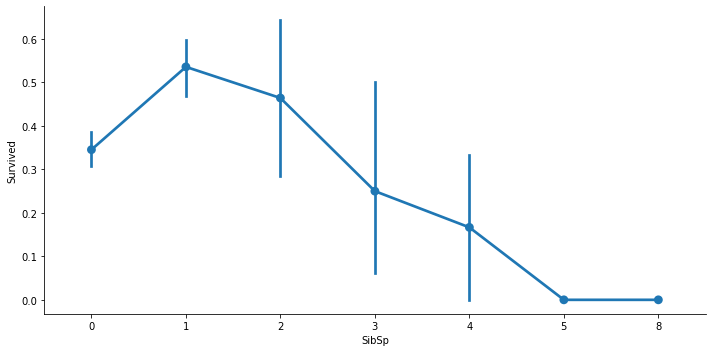

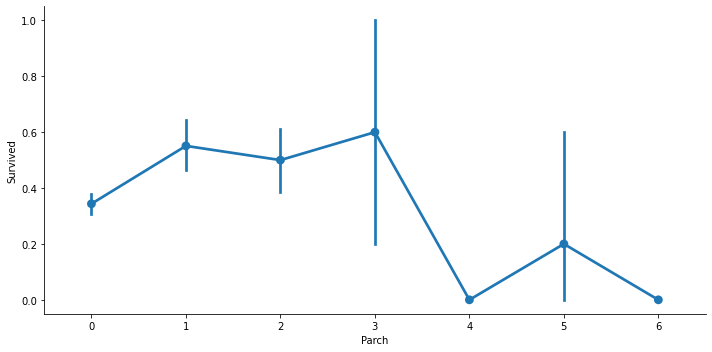

In [176]:
#verificando a chance de sobreviver tendo irmãos e cônjuges ou pais e filhos

for i, col in enumerate(['SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x = col, y = 'Survived', data = dados, kind = 'point', aspect = 2,)

In [177]:
#Criei uma coluna com as informaçoes de parentes
dados['Parentesco'] = dados['SibSp'] + dados['Parch']

<Figure size 432x288 with 0 Axes>

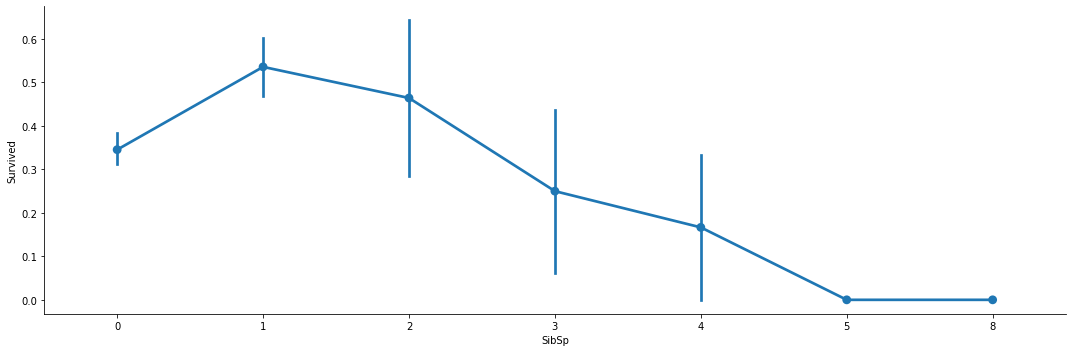

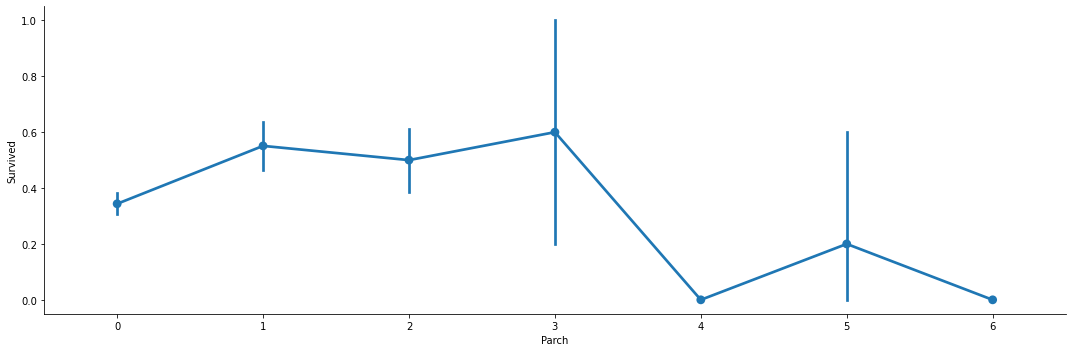

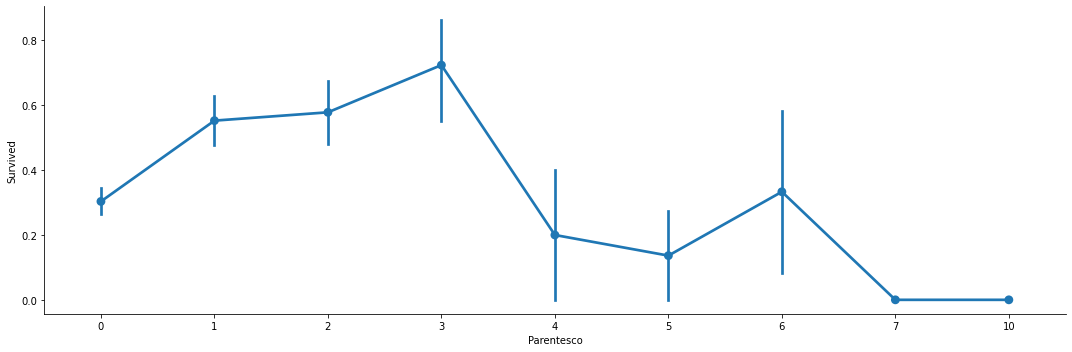

In [178]:
#Fazendo uma comparação entre as colunas que demosntra diferença mas segue mesmo padrão
for i, col in enumerate(['SibSp','Parch', 'Parentesco']):
    plt.figure(i)
    sns.catplot(x = col, y = 'Survived', data = dados, kind = 'point', aspect = 3,)

In [179]:
#tratando os dados da coluna Embarked
dados.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [180]:
#observando a moda da coluna
dados.Embarked.mode()

0    S
dtype: object

In [181]:
#Inserindo nos valores missing o valor da moda
dados['Embarked'].fillna('S', inplace = True)

In [182]:
#tratamento dos valores missing foi concluido
dados.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Parentesco     0
dtype: int64

In [183]:
#dropando as colunas SibSp e Parch
dados.drop(['PassengerId','SibSp', 'Parch', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [184]:
#renomeando os dados

dados.rename(columns={'Survived':"Sobreviveu",'Pclass':"Classe",'Sex':"Sexo",'Age':"Idade",'Fare':"Preço"}, inplace=True)
dados.head()

,Sobreviveu,Classe,Sexo,Idade,Preço,Parentesco
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,1
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,1
4,0,3,male,35.0,8.0500,0


__Possíveis Insights__

Sobreviveu - Booleano
Classe - Numerico Discreto
Nome - Nominal
Sexo - Nominal
Idade - Numerico Continuo
Ticket - Ordinal
Preço - Numerico Continuo
Embarked - Ordinal
Parentesco - Numerico Discreto

In [185]:
dados.corr()

,Sobreviveu,Classe,Idade,Preço,Parentesco
Sobreviveu,1.000000,-0.338481,-0.069809,0.257307,0.016639
Classe,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Idade,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Preço,0.257307,-0.549500,0.091566,1.000000,0.217138
Parentesco,0.016639,0.065997,-0.248512,0.217138,1.000000


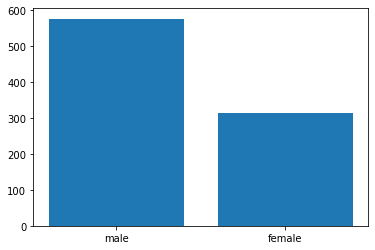

In [186]:
sexo = dados.Sexo.value_counts()

plt.bar(sexo.index, sexo.values)
plt.show()

In [187]:
sexo

male      577
female    314
Name: Sexo, dtype: int64

In [188]:
print("Idade média: ", dados.Idade.mean())
print("Idade elevada: ", dados.Idade.max())
print("Idade menos elevada: ", dados.Idade.min())

Idade média:  29.699117647058763
Idade elevada:  80.0
Idade menos elevada:  0.42


In [189]:
dados.columns

Index(['Sobreviveu', 'Classe', 'Sexo', 'Idade', 'Preço', 'Parentesco'], dtype='object')

In [190]:
sobreviveram = dados.Sobreviveu.value_counts()
sobreviveram

0    549
1    342
Name: Sobreviveu, dtype: int64

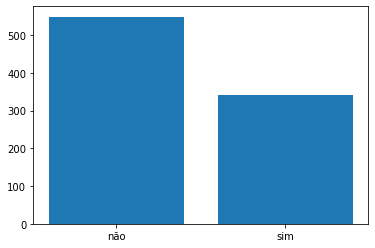

In [191]:
Possibilidades = ['não','sim']
sobreviveram = sobreviveram.values
plt.bar(Possibilidades, sobreviveram)
plt.show()

In [192]:
idades = dados.loc[dados[dados['Sobreviveu']==0].index, 'Idade'].value_counts()
idades

29.699118    125
21.000000     19
28.000000     18
25.000000     17
18.000000     17
            ... 
15.000000      1
36.500000      1
23.500000      1
55.500000      1
74.000000      1
Name: Idade, Length: 78, dtype: int64

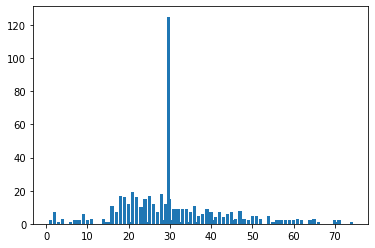

In [193]:
plt.bar(idades.index, idades)
plt.show()

In [194]:
dados

,Sobreviveu,Classe,Sexo,Idade,Preço,Parentesco
0,0,3,male,22.000000,7.2500,1
1,1,1,female,38.000000,71.2833,1
2,1,3,female,26.000000,7.9250,0
3,1,1,female,35.000000,53.1000,1
4,0,3,male,35.000000,8.0500,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,0
887,1,1,female,19.000000,30.0000,0
888,0,3,female,29.699118,23.4500,3
889,1,1,male,26.000000,30.0000,0


__Normallização dos Dados__

In [195]:
Idades = dados.Idade.values
Idades

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [196]:
dados.shape

(891, 6)

*criança: 0 a 12
*adolescente: 13 a 18
*adulto: 19 a 59
*idoso: 60+

In [197]:
indexCriança = dados[dados.Idade<= 12].index
indexAdolescente = dados[(dados.Idade>= 12) & (dados.Idade<= 18)].index
indexAdulto = dados[(dados.Idade>= 19) & (dados.Idade<= 59)].index
indexIdoso = dados[dados.Idade>=60].index

In [198]:
dados.loc[indexCriança, 'Idade']='Criança'
dados.loc[indexAdolescente, 'Idade']='Adolescente'
dados.loc[indexAdulto, 'Idade']='Adulto'
dados.loc[indexIdoso, 'Idade']='Idoso'
dados

,Sobreviveu,Classe,Sexo,Idade,Preço,Parentesco
0,0,3,male,Adulto,7.2500,1
1,1,1,female,Adulto,71.2833,1
2,1,3,female,Adulto,7.9250,0
3,1,1,female,Adulto,53.1000,1
4,0,3,male,Adulto,8.0500,0
...,...,...,...,...,...,...
886,0,2,male,Adulto,13.0000,0
887,1,1,female,Adulto,30.0000,0
888,0,3,female,Adulto,23.4500,3
889,1,1,male,Adulto,30.0000,0


In [199]:
Idades = dados.Idade.value_counts()
Idades

Adulto         726
Adolescente     71
Criança         68
Idoso           26
Name: Idade, dtype: int64

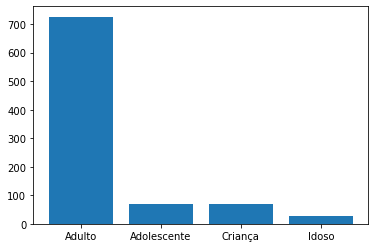

In [200]:
plt.bar(Idades.index, Idades)
plt.show()

In [201]:
dados.loc[dados[dados.Idade == 'Criança'].index, 'Idade']=1
dados.loc[dados[dados.Idade == 'Adolescente'].index, 'Idade']=2
dados.loc[dados[dados.Idade == 'Adulto'].index, 'Idade']=3
dados.loc[dados[dados.Idade == 'Idoso'].index, 'Idade']=4

In [202]:
dados.loc[dados[dados.Sexo == 'male'].index, 'Sexo']=0
dados.loc[dados[dados.Sexo == 'female'].index, 'Sexo']=1
dados

,Sobreviveu,Classe,Sexo,Idade,Preço,Parentesco
0,0,3,0,3,7.2500,1
1,1,1,1,3,71.2833,1
2,1,3,1,3,7.9250,0
3,1,1,1,3,53.1000,1
4,0,3,0,3,8.0500,0
...,...,...,...,...,...,...
886,0,2,0,3,13.0000,0
887,1,1,1,3,30.0000,0
888,0,3,1,3,23.4500,3
889,1,1,0,3,30.0000,0


In [203]:
dados.describe()

,Sobreviveu,Classe,Preço,Parentesco
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,32.204208,0.904602
std,0.486592,0.836071,49.693429,1.613459
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,7.910400,0.000000
50%,0.000000,3.000000,14.454200,0.000000
75%,1.000000,3.000000,31.000000,1.000000
max,1.000000,3.000000,512.329200,10.000000


In [204]:
correlacao = dados.corr()

<AxesSubplot:>

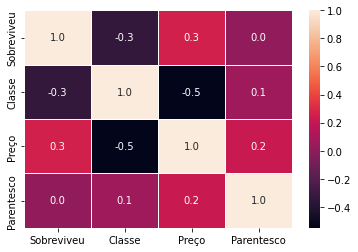

In [205]:
import seaborn as sns

plot = sns.heatmap(correlacao, annot=True, fmt='.1f', linewidths=.6)
plot

In [206]:
ss = dados.groupby('Sobreviveu')['Sexo'].value_counts()
ss

Sobreviveu  Sexo
0           0       468
            1        81
1           1       233
            0       109
Name: Sexo, dtype: int64

In [207]:
tbl_freq_sex = pd.DataFrame(dados.Sexo.value_counts())
tbl_freq_sex.rename(columns = {'Sexo':'freq_abs_sex'}, inplace = True)
tbl_freq_sex['freq_relativa_sexo'] = round(tbl_freq_sex.freq_abs_sex  /tbl_freq_sex.freq_abs_sex.sum(),2)

In [208]:
tbl_freq_sex

,freq_abs_sex,freq_relativa_sexo
0,577,0.65
1,314,0.35


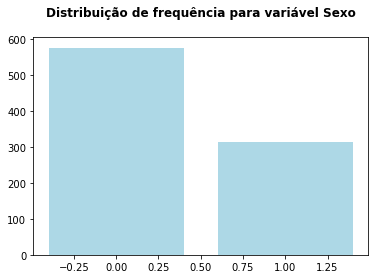

In [209]:
plt.bar(dados.Sexo.unique(), dados.Sexo.value_counts(), color = 'lightblue')
plt.title('Distribuição de frequência para variável Sexo\n', {'fontsize': 12,'fontweight': 'bold'})
plt.show()

Qual a probabilidade de sobreviver dado que é um homem? e dado que é mulher?

$ P(A|B) = \dfrac{P(A \cap B)}{P(B)}$

In [210]:
#probabilidade de sobreviver geral:

round(dados.Sobreviveu.value_counts()/dados.Sobreviveu.shape[0],2)

0    0.62
1    0.38
Name: Sobreviveu, dtype: float64

In [211]:
# A: sobreviver
# B: ser homem/mulher

prob_h = dados[(dados.Sobreviveu==1) & (dados.Sexo ==0)].shape[0] / dados[dados.Sexo==0].shape[0]
prob_m = dados[(dados.Sobreviveu==1) & (dados.Sexo==1)].shape[0] / dados[dados.Sexo==1].shape[0]

print("Probabilidade de sobreviver sendo homem:", round(prob_h,2))
print("Probabilidade de sobreviver sendo mulher:", round(prob_m,2))

#É provável então que exista grande correlação entre ter sobrevevido e o sexo.

Probabilidade de sobreviver sendo homem: 0.19
Probabilidade de sobreviver sendo mulher: 0.74


__Criação do modelo__

__*Importando o dataset de teste__

In [212]:
dados_teste = pd.read_csv("test.csv")
dados_teste = dados_teste.drop(dados_teste[['PassengerId','Name','Cabin']],axis=1)
dados_teste

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1,female,39.0,0,0,PC 17758,108.9000,C
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,male,NaN,0,0,359309,8.0500,S


In [213]:
dados_teste.rename(columns={'Pclass':"Classe",'Sex':"Sexo",'Age':"Idade",'Fare':"Preço"}, inplace=True)
dados_teste.head()

,Classe,Sexo,Idade,SibSp,Parch,Ticket,Preço,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S


In [214]:
dados_teste['Parentesco'] = dados_teste['SibSp'] + dados_teste['Parch']
dados_teste.drop(dados_teste[['SibSp','Parch']],axis=1)

,Classe,Sexo,Idade,Ticket,Preço,Embarked,Parentesco
0,3,male,34.5,330911,7.8292,Q,0
1,3,female,47.0,363272,7.0000,S,1
2,2,male,62.0,240276,9.6875,Q,0
3,3,male,27.0,315154,8.6625,S,0
4,3,female,22.0,3101298,12.2875,S,2
...,...,...,...,...,...,...,...
413,3,male,NaN,A.5. 3236,8.0500,S,0
414,1,female,39.0,PC 17758,108.9000,C,0
415,3,male,38.5,SOTON/O.Q. 3101262,7.2500,S,0
416,3,male,NaN,359309,8.0500,S,0


In [215]:
dados_teste

,Classe,Sexo,Idade,SibSp,Parch,Ticket,Preço,Embarked,Parentesco
0,3,male,34.5,0,0,330911,7.8292,Q,0
1,3,female,47.0,1,0,363272,7.0000,S,1
2,2,male,62.0,0,0,240276,9.6875,Q,0
3,3,male,27.0,0,0,315154,8.6625,S,0
4,3,female,22.0,1,1,3101298,12.2875,S,2
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,A.5. 3236,8.0500,S,0
414,1,female,39.0,0,0,PC 17758,108.9000,C,0
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,3,male,NaN,0,0,359309,8.0500,S,0


In [216]:
dados_treino = dados
X_treino = dados.drop('Sobreviveu', axis=1)
y_treino = dados['Sobreviveu']
X_teste = dados_teste.copy()

In [217]:
dados_teste.loc[dados_teste[dados_teste.Sexo == 'male'].index, 'Sexo']=0
dados_teste.loc[dados_teste[dados_teste.Sexo == 'female'].index, 'Sexo']=1
dados_teste

,Classe,Sexo,Idade,SibSp,Parch,Ticket,Preço,Embarked,Parentesco
0,3,0,34.5,0,0,330911,7.8292,Q,0
1,3,1,47.0,1,0,363272,7.0000,S,1
2,2,0,62.0,0,0,240276,9.6875,Q,0
3,3,0,27.0,0,0,315154,8.6625,S,0
4,3,1,22.0,1,1,3101298,12.2875,S,2
...,...,...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,A.5. 3236,8.0500,S,0
414,1,1,39.0,0,0,PC 17758,108.9000,C,0
415,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,3,0,NaN,0,0,359309,8.0500,S,0


In [220]:
dados_teste.drop(dados_teste[['SibSp','Parch','Ticket','Embarked']],axis=1)
dados_teste.isnull().sum()

Classe         0
Sexo           0
Idade         86
SibSp          0
Parch          0
Ticket         0
Preço          1
Embarked       0
Parentesco     0
dtype: int64

In [223]:
X_treino.shape, y_treino.shape, X_teste.shape

((891, 5), (891,), (418, 9))

In [221]:
#Regressão Logistica
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_treino, y_treino)

LogisticRegression()

In [226]:
dados_teste.Sexo.value_counts()

0    266
1    152
Name: Sexo, dtype: int64

In [227]:
dados_treino

,Sobreviveu,Classe,Sexo,Idade,Preço,Parentesco
0,0,3,0,3,7.2500,1
1,1,1,1,3,71.2833,1
2,1,3,1,3,7.9250,0
3,1,1,1,3,53.1000,1
4,0,3,0,3,8.0500,0
...,...,...,...,...,...,...
886,0,2,0,3,13.0000,0
887,1,1,1,3,30.0000,0
888,0,3,1,3,23.4500,3
889,1,1,0,3,30.0000,0
